# Single-hidden-layer Neural Network
## Setup

In [1]:
# import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import time

# load datasets
fifa = np.load('./datasets/fifa.npz')
finance = np.load('./datasets/finance.npz')
orbits = np.load('./datasets/orbits.npz')

## Refactored Function
Codes for common procedures are refactored into function below for simplicity.

In [2]:
def run_neural_network(dataset):
    # load data
    X_train = dataset['train_X']
    Y_train = dataset['classification_train_Y']
    X_test = dataset['test_X']
    Y_test = dataset['classification_test_Y']
    
    # hidden layer size candidates
    hidden_layer_sizes = []
    for i in range(1, 11):
        hidden_layer_sizes.append((i,))

    # start timer
    start_time = time.time()
    
    # define model and use GridSearchCV to tune hyperparam
    estimator = MLPClassifier(
        activation='relu',
        solver='adam',
        alpha=1e-4, # L2 Regularization Strength
        learning_rate_init=1e-3,
        early_stopping=True,
        validation_fraction=0.2,
        tol=1e-4, # early stop improvment threshold
        n_iter_no_change=10, # early stop consec iter threshold
        verbose=False,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-8 # small num to avoid division by zero
    )
    gs = GridSearchCV(
        estimator=estimator,
        param_grid={'hidden_layer_sizes': hidden_layer_sizes},
        cv=5 # 5 folds as required
    )
    
    # train model
    gs.fit(X_train, Y_train)
    
    # predictions
    Y_train_pred = gs.predict(X_train)
    Y_test_pred = gs.predict(X_test)
    
    # stop timer
    print('Time elapsed for tuning, training and predictions: %.3f seconds' % (time.time() - start_time))
    print('\n')
    
    # evaluate gridsearch
    print('Best hyperparam found: ', gs.best_params_)
    plt.plot(range(1, 11), gs.cv_results_['mean_test_score'])
    plt.title('Cross Validation Score vs Hidden Layer Size')
    plt.ylabel('Score')
    plt.xlabel('Hidden Layer Size')
    plt.show()
    
    # evaluate training process
    plt.plot(gs.best_estimator_.loss_curve_)
    plt.title('Loss during training')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()
    print('Model final loss: ', gs.best_estimator_.loss_)
    
    plt.plot(gs.best_estimator_.validation_scores_)
    plt.title('Validation Accuracy during training')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.show()
    
    # evaluate training result
    print('Training set accuracy: %.3f' % accuracy_score(Y_train, Y_train_pred))
    conmat_train = confusion_matrix(Y_train, Y_train_pred)
    plt.title('Training Set: Confusion Matrix')
    sns.heatmap(conmat_train, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    # evaluate testing result
    print('Testing set accuracy: %.3f' % accuracy_score(Y_test, Y_test_pred))
    conmat_test = confusion_matrix(Y_test, Y_test_pred)
    plt.title('Testing Set: Confusion Matrix')
    sns.heatmap(conmat_test, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

## Model Settings
- Activation Layer: ReLU
- Optimizer: Adam
- Learning Rate: 1e-3
- beta1: 0.9
- beta2: 0.999
- epsilon: 1e-8
- L2 Regularization Strength: 1e-4
- Early Stopping: if validation subset (20% of training) accuracy not improving by 1e-4 over 10 epochs

## FIFA Dataset

Time elapsed for tuning, training and predictions: 50.987 seconds


Best hyperparam found:  {'hidden_layer_sizes': (6,)}


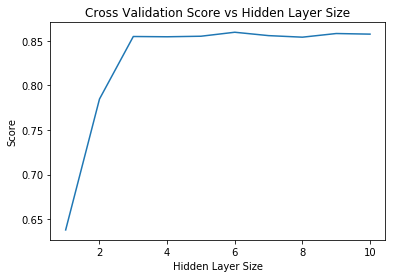

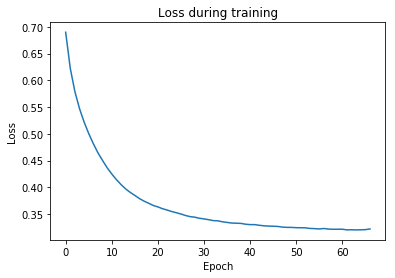

Model final loss:  0.32206745378686796


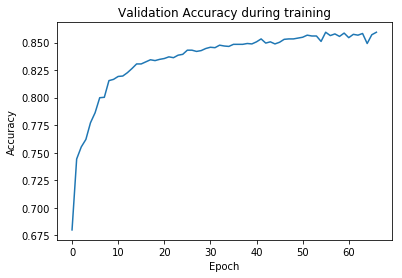

Training set accuracy: 0.860


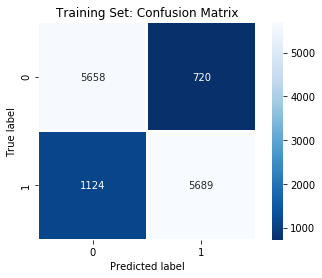

Testing set accuracy: 0.852


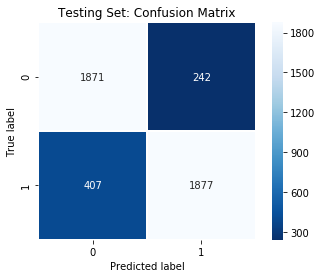

In [3]:
run_neural_network(fifa)

## Finance Dataset

/Users/chihim/anaconda3/envs/comp4211/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Time elapsed for tuning, training and predictions: 10.106 seconds


Best hyperparam found:  {'hidden_layer_sizes': (9,)}


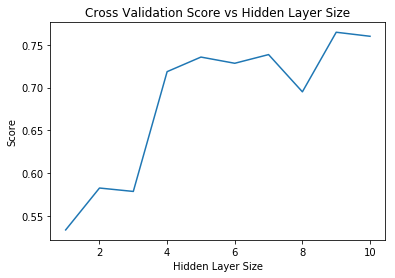

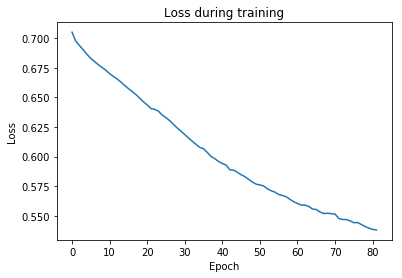

Model final loss:  0.5379940409917832


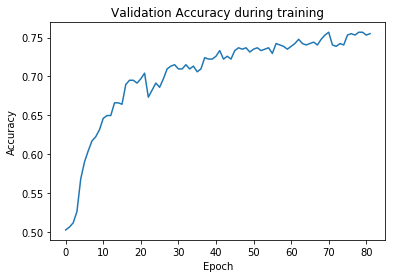

Training set accuracy: 0.737


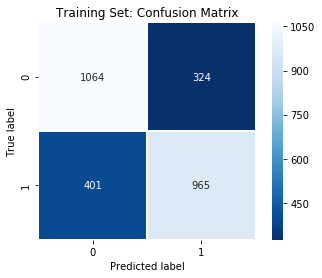

Testing set accuracy: 0.737


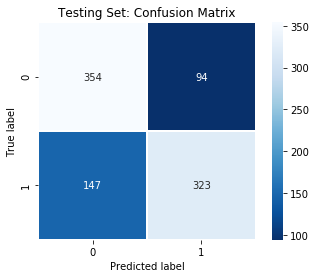

In [4]:
run_neural_network(finance)

## Orbits Dataset

/Users/chihim/anaconda3/envs/comp4211/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/chihim/anaconda3/envs/comp4211/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/chihim/anaconda3/envs/comp4211/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Time elapsed for tuning, training and predictions: 45.626 seconds


Best hyperparam found:  {'hidden_layer_sizes': (9,)}


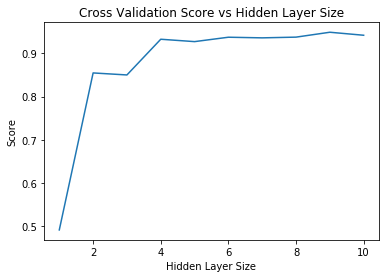

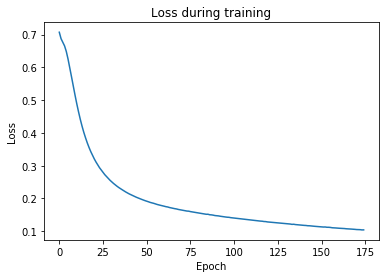

Model final loss:  0.10403231134773122


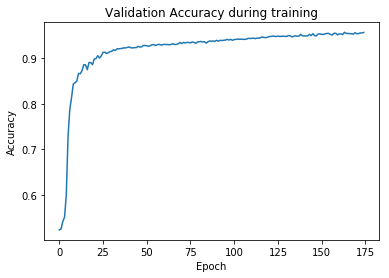

Training set accuracy: 0.962


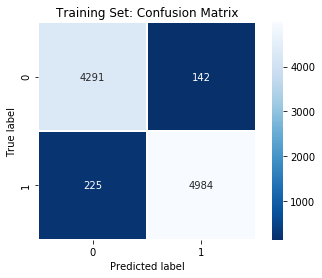

Testing set accuracy: 0.964


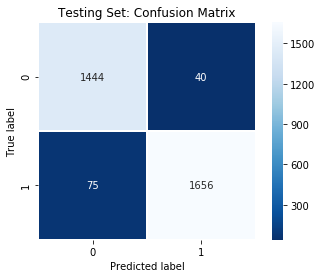

In [5]:
run_neural_network(orbits)